###  PART 3: - Python code for Machine Learning Models

This Notebook contains the python code for the following tasks: 

* Categorization of the features into numerical and categorical variables
* Encoding the categorical features using one-hot encoding and ordinal encoding
* Encoding the target variable as 0 for non-default and 1 for default
* Predictor-Response categorization and Train-Test split of data
* Scaling the numerical features using Standard Scaler
* Creation of Various Machine Learnng Models.
* Comparison of all ML models and Selection of Best model. 
* Further optimization of performance of the selected model. 


**Observations:** 

- Based on the part 1 and part 2 analysis we know that there are a lotal of 17 columns in the dataset and out of total 17 , 7 are Numerical Columns and remaining 10 are Categorical Columns. 

- Further, out of 10 categorical columns there are only 2 Ordinal Categorical Columns and remaining 8 are Nominal Categorical Columns. 

- Some of the columns have 'unknown', 'none','unemployed' or 'other' as a category and hence cannot be considered as an Ordinal Columns even though other categories within the column are in order.

- So we have following Predictor - Response variables : 

**Predictors variables:**

- **Numerical Variables:**[Total 7] ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']

- **Categorical Variables:** [Total 10]

    - **Nominal columns:** ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
    - **Ordinal columns:** ['credit_history', 'employment_duration']


**Target variable:**  ['default'] (indicates whether the customer defaulted on the loan or not)

In [1]:
# importing required libriries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.metrics import roc_curve, roc_auc_score




In [2]:
# Loading the CSV file into a DataFrame
csv_filename = 'Part1_Output.csv'
df = pd.read_csv(csv_filename)

#print(df.columns)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


## Data Encoding

In [3]:
# Encoding for Nominal Categorical variables using one-hot-encoding.  

# Using one-hot encoding for Nominal columns 
nominal_columns = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[nominal_columns]

# Fitting and transforming on the nominal data
ohencoder = OneHotEncoder()
encoded_nominal_data = ohencoder.fit_transform(nominal_data)

# Encoding of nominal features with suitable names
encoded_nominal_columns = ohencoder.get_feature_names_out(input_features=nominal_columns)
encoded_nominal_df = pd.DataFrame(encoded_nominal_data.toarray(), columns=encoded_nominal_columns)

encoded_nominal_df

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
# Encoding for Ordinal Categorical variables

# Ordinal columns in ordered ranking of values
ordinal_columns = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

# Creating dataFrame for the ordinal columns
ordinal_df = df[list(ordinal_columns.keys())]

# using OrdinalEncoder with specified ordered levels
ordinal_encoder = OrdinalEncoder(categories=[ordinal_columns[col] for col in ordinal_df.columns])

# Fitting and transforming the ordinal data.
ordinal_encoded_df = pd.DataFrame(ordinal_encoder.fit_transform(ordinal_df), columns=ordinal_df.columns)

# Modifying Column names by adding a suffix '_encoded' to the column names
encoded_ordinal_suffix = "_encoded"
ordinal_encoded_df.columns = [f"{col}{encoded_ordinal_suffix}" for col in ordinal_encoded_df.columns]

ordinal_encoded_df

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [5]:
# combining both nominal and ordinal categorigal dataframes with original dataframe. 

# Combined dataframe with encoded Categorical variables and numerical variables
df_final = pd.concat([df, encoded_nominal_df, ordinal_encoded_df], axis=1)

# Droping the original nominal and ordinal columns
df_final.drop(columns=list(nominal_columns) + list(ordinal_columns.keys()), inplace=True)

# Mapping of the 'default' target column, mapping 'no' to 0 and 'yes' to 1
df_final['default'] = df_final['default'].map({'no': 0, 'yes': 1})

pd.set_option('display.max_columns', None)
print(df_final.info())
df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   months_loan_duration           1000 non-null   int64  
 1   amount                         1000 non-null   int64  
 2   percent_of_income              1000 non-null   int64  
 3   years_at_residence             1000 non-null   int64  
 4   age                            1000 non-null   int64  
 5   existing_loans_count           1000 non-null   int64  
 6   dependents                     1000 non-null   int64  
 7   default                        1000 non-null   int64  
 8   checking_balance_1 - 200 DM    1000 non-null   float64
 9   checking_balance_< 0 DM        1000 non-null   float64
 10  checking_balance_> 200 DM      1000 non-null   float64
 11  checking_balance_unknown       1000 non-null   float64
 12  purpose_business               1000 non-null   fl

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,6,1169,4,4,67,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,48,5951,2,2,22,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,12,2096,2,3,49,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,42,7882,2,4,45,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,24,4870,3,4,53,2,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
996,30,3857,4,4,40,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
997,12,804,4,4,38,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
998,45,1845,4,4,23,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0


## Predictor-Response and Train-Test split 

In [6]:
# Creating redictors and Response Variables 
X = df_final.drop(columns=['default'])     # all variables except 'default'
y = df_final['default']                    # 'default' as response  

# Spliting the data into Train and Test datasets in 75:25 ratio with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Standard Scaling (Standardization)

In [7]:
# Doing the Standard Scaling only after train-test split to avoid data leakage.

# Initializing StandardScaler and doing the fit-transform on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the Test data
X_test_scaled = scaler.transform(X_test)

## Building Machine Learning Models

### Model 1: Logistic Regression

In [8]:
# Building Logistic Regression model
logit = LogisticRegression(random_state=1)

# Fitting the model on the training data
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [9]:
# Making predictions on the training data
y_pred_train_logit = logit.predict(X_train_scaled)

# Performance metrics on training data
print("Logistic Regression - Training Set Performance:\n ")
print(classification_report(y_train, y_pred_train_logit))

conf_matrix_train_logit = confusion_matrix(y_train, y_pred_train_logit)
print("Logistic Regression - Confusion Matrix (Training Set): \n")
print(conf_matrix_train_logit)



Logistic Regression - Training Set Performance:
 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       525
           1       0.65      0.47      0.55       225

    accuracy                           0.77       750
   macro avg       0.72      0.68      0.69       750
weighted avg       0.75      0.77      0.75       750

Logistic Regression - Confusion Matrix (Training Set): 

[[468  57]
 [119 106]]


 Logistic Regression - Test Set Performance: 
 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       175
           1       0.61      0.48      0.54        75

    accuracy                           0.75       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250



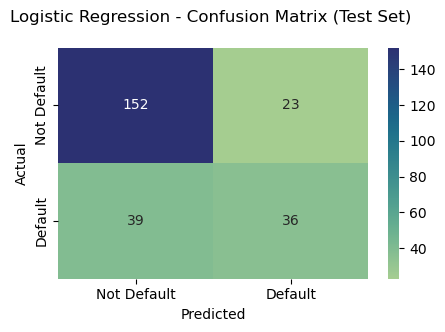

In [10]:
# Making predictions on the test data
y_pred_test_logit = logit.predict(X_test_scaled)

# Performance metrics on test data
print(" Logistic Regression - Test Set Performance: \n ")
print(classification_report(y_test, y_pred_test_logit))
conf_matrix_test_logit = confusion_matrix(y_test, y_pred_test_logit)

# creating heatmap of the confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_logit, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Logistic Regression - Confusion Matrix (Test Set) \n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 2: Quadratic Discriminant Analysis (QDA)

In [11]:
# Unlike Logistic Regression, QDA directly predicts the class-labels.

# Initializing Quadratic Discriminant Analysis 
qda = QuadraticDiscriminantAnalysis()

# Fitting the model on the training data
qda.fit(X_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

In [12]:
# Making predictions on training data

y_pred_train_qda = qda.predict(X_train_scaled)

# Performance metrics on training data
print("Quadratic Discriminant Analysis - Training Set Performance:\n ")
print(classification_report(y_train, y_pred_train_qda))

conf_matrix_train_qda = confusion_matrix(y_train, y_pred_train_qda)
print("Quadratic Discriminant Analysis - Confusion Matrix (Training Set): \n")
print(conf_matrix_train_qda)



Quadratic Discriminant Analysis - Training Set Performance:
 
              precision    recall  f1-score   support

           0       0.75      0.91      0.83       525
           1       0.60      0.30      0.40       225

    accuracy                           0.73       750
   macro avg       0.68      0.61      0.61       750
weighted avg       0.71      0.73      0.70       750

Quadratic Discriminant Analysis - Confusion Matrix (Training Set): 

[[480  45]
 [157  68]]





Quadratic Discriminant Analysis - Test Set Performance:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       175
           1       0.42      0.19      0.26        75

    accuracy                           0.68       250
   macro avg       0.57      0.54      0.53       250
weighted avg       0.63      0.68      0.63       250



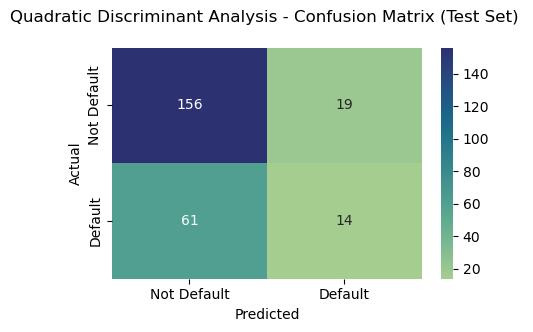

In [13]:
# Making predictions on test data

y_pred_test_qda = qda.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nQuadratic Discriminant Analysis - Test Set Performance:")
print(classification_report(y_test, y_pred_test_qda))
conf_matrix_test_qda = confusion_matrix(y_test, y_pred_test_qda)

# creating heatmap of the Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_qda, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Quadratic Discriminant Analysis - Confusion Matrix (Test Set) \n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 3: Support Vector Machine (SVM)

In [14]:
# Initializing Support Vector Machines model
svm = SVC(random_state=42)

# Finding the best hyperparameters which gives the highest 'recall' performance
param_grid = {
    'C': [5, 10, 15, 20, 25],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Fitting the grid search on the training data for hyperparameter tuning with best 'recall'
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters values from grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("C:", best_C)
print("Kernel:", best_kernel)
print("Gamma:", best_gamma)

# Initializing Support Vector Machines model with the best hyperparameters
svm_best = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=1)

# Fitting the model on the training data
svm_best.fit(X_train_scaled, y_train)

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
C: 25
Kernel: rbf
Gamma: scale


SVC(C=25, random_state=1)

In [15]:
# Making predictions on training data
y_pred_train_svm = svm_best.predict(X_train_scaled)

# Performance metrics on training data
print("Support Vector Machines (with Best Hyperparameters) - Training Set Performance: \n")
print(classification_report(y_train, y_pred_train_svm))
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)
print("Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set): \n")
print(conf_matrix_train_svm)


Support Vector Machines (with Best Hyperparameters) - Training Set Performance: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       525
           1       1.00      0.95      0.97       225

    accuracy                           0.98       750
   macro avg       0.99      0.97      0.98       750
weighted avg       0.98      0.98      0.98       750

Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set): 

[[524   1]
 [ 12 213]]


 Support Vector Machines (with Best Hyperparameters) - Test Set Performance: 

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       175
           1       0.51      0.47      0.49        75

    accuracy                           0.70       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.70      0.70      0.70       250



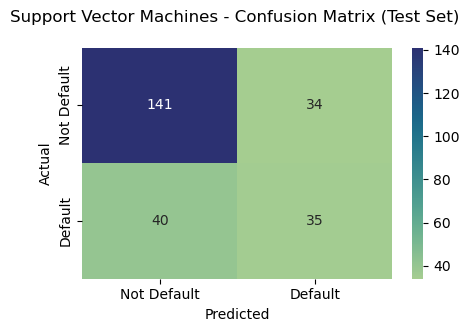

In [16]:
# Making predictions on test data

y_pred_test_svm = svm_best.predict(X_test_scaled)

# Performance metrics on test data
print(" Support Vector Machines (with Best Hyperparameters) - Test Set Performance: \n")
print(classification_report(y_test, y_pred_test_svm))
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Support Vector Machines - Confusion Matrix (Test Set) \n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 4 : k-nearest neighbors algorithm (k-NN)

In [17]:

# KNN algorithm gives outputs the class-label predictions directly instead of probabilities.

# Initializing K-Nearest Neighbors
knn = KNeighborsClassifier()

# Hyperparameters tuning with GridSearchCV to find the best value of 'k' which gives highest 'recall' performance
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5]
}

# Fitting the grid search on the training data
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best value of 'k'
print("Best value of 'k':", best_n_neighbors)

# Initializing the  K-Nearest Neighbors model with the best hyperparameter 'k' value
knn_bestk = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fitting the model on the training data
knn_bestk.fit(X_train_scaled, y_train)

Best value of 'k': 3


KNeighborsClassifier(n_neighbors=3)

In [18]:
# Making predictions on training data
y_pred_train_knn = knn_bestk.predict(X_train_scaled)

# Performance metrics on training data
print("K-Nearest Neighbors (with Best 'k') - Training Set Performance:\n ")
print(classification_report(y_train, y_pred_train_knn))
conf_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
print("K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):\n")
print(conf_matrix_train_knn)



K-Nearest Neighbors (with Best 'k') - Training Set Performance:
 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       525
           1       0.79      0.62      0.69       225

    accuracy                           0.84       750
   macro avg       0.82      0.77      0.79       750
weighted avg       0.83      0.84      0.83       750

K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):

[[487  38]
 [ 85 140]]


 K-Nearest Neighbors (with Best 'k') - Test Set Performance:
 
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       175
           1       0.48      0.40      0.43        75

    accuracy                           0.69       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.67      0.69      0.68       250



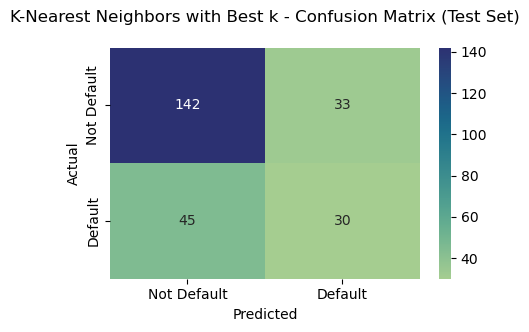

In [19]:
# Making predictions on test data
y_pred_test_knn = knn_bestk.predict(X_test_scaled)

# Performance metrics on test data
print(" K-Nearest Neighbors (with Best 'k') - Test Set Performance:\n ")
print(classification_report(y_test, y_pred_test_knn))
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)

#  Creating Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('K-Nearest Neighbors with Best k - Confusion Matrix (Test Set)\n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 5 : Gradient Boosting Model (GBM)

In [20]:
# Initializing Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [2, 3, 4, 5],
}

# Fitting the grid search on the training data
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initializing Gradient Boosting model with best hyperparameters
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                                    max_depth=best_max_depth,
                                                    random_state=1)
# Fitting the model on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 100
learning_rate: 0.2
max_depth: 3


GradientBoostingClassifier(learning_rate=0.2, random_state=1)

In [21]:
# Making Predictions on training data

y_pred_train_gb = gradient_boosting_best.predict(X_train_scaled)

# Performance metrics on training data
print("Gradient Boosting (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb))
conf_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)
print("Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):\n")
print(conf_matrix_train_gb)


Gradient Boosting (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       525
           1       0.98      0.88      0.93       225

    accuracy                           0.96       750
   macro avg       0.97      0.94      0.95       750
weighted avg       0.96      0.96      0.96       750

Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):

[[521   4]
 [ 26 199]]





Gradient Boosting (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       175
           1       0.62      0.53      0.58        75

    accuracy                           0.76       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.76      0.76      0.76       250



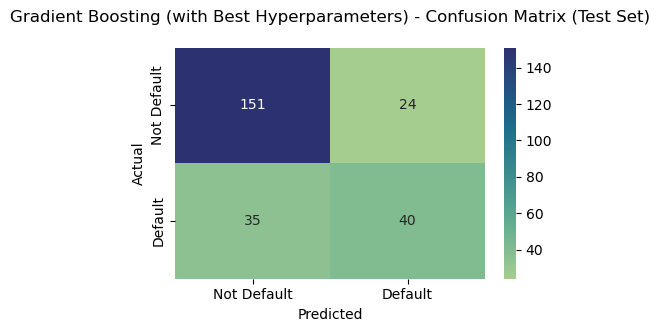

In [22]:

# Making predictions on test data
y_pred_test_gb = gradient_boosting_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nGradient Boosting (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb))
conf_matrix_test_gb = confusion_matrix(y_test, y_pred_test_gb)

# Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_gb, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Test Set)\n ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 6: Random Decision Forest Model

In [23]:
# Initializing Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV (with 'recall' scoring)
param_grid = {
    'n_estimators': [350, 400, 450, 500],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4, 5]
}

# Fitting the grid search on the training data
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

# Initializing Random Forest model with best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            random_state=42)

# Fitting the model on the training data
random_forest_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 400
max_depth: None
min_samples_split: 3


RandomForestClassifier(min_samples_split=3, n_estimators=400, random_state=42)

In [24]:
# Making predictions on training data
y_pred_train_rf = random_forest_best.predict(X_train_scaled)

# Performance metrics on training data
print("Random Forest (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_rf))
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
print("Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):\n ")
print(conf_matrix_train_rf)



Random Forest (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):
 
[[525   0]
 [  0 225]]




 Random Forest (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       175
           1       0.62      0.44      0.52        75

    accuracy                           0.75       250
   macro avg       0.70      0.66      0.67       250
weighted avg       0.74      0.75      0.74       250



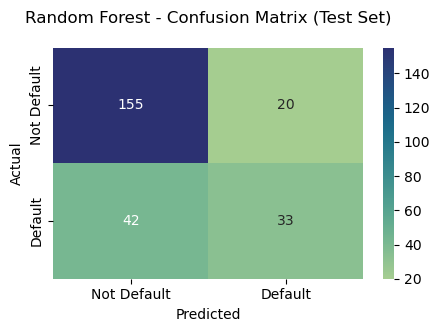

In [25]:
# Making predictions on test data
y_pred_test_rf = random_forest_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n Random Forest (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_rf))
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Random Forest - Confusion Matrix (Test Set)\n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 7: AdaBoost Model

In [26]:
# Initializing AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9],
}

# Fitting the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

# Initializing AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=1)

# Fitting the model on the training data
adaboost_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 150
learning_rate: 0.7


AdaBoostClassifier(learning_rate=0.7, n_estimators=150, random_state=1)

In [27]:
# Making predictions on training data
y_pred_train_adaboost = adaboost_best.predict(X_train_scaled)

# Performance metrics on training data
print("AdaBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_adaboost))
conf_matrix_train_adaboost = confusion_matrix(y_train, y_pred_train_adaboost)
print("AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set): \n")
print(conf_matrix_train_adaboost)


AdaBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       525
           1       0.75      0.58      0.65       225

    accuracy                           0.82       750
   macro avg       0.79      0.75      0.76       750
weighted avg       0.81      0.82      0.81       750

AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set): 

[[482  43]
 [ 95 130]]





AdaBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       175
           1       0.57      0.47      0.51        75

    accuracy                           0.74       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.72      0.74      0.73       250



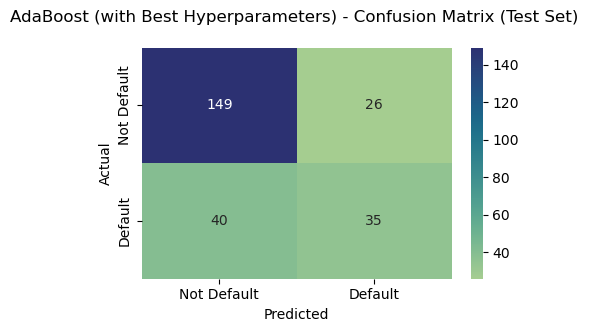

In [28]:
# Making predictions on test data
y_pred_test_adaboost = adaboost_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nAdaBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_adaboost))
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

# Confusion matrix for test data
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('AdaBoost (with Best Hyperparameters) - Confusion Matrix (Test Set) \n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## AUC-PR for Model Selection 

In [29]:
# Statistics for the qualitative categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,5,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


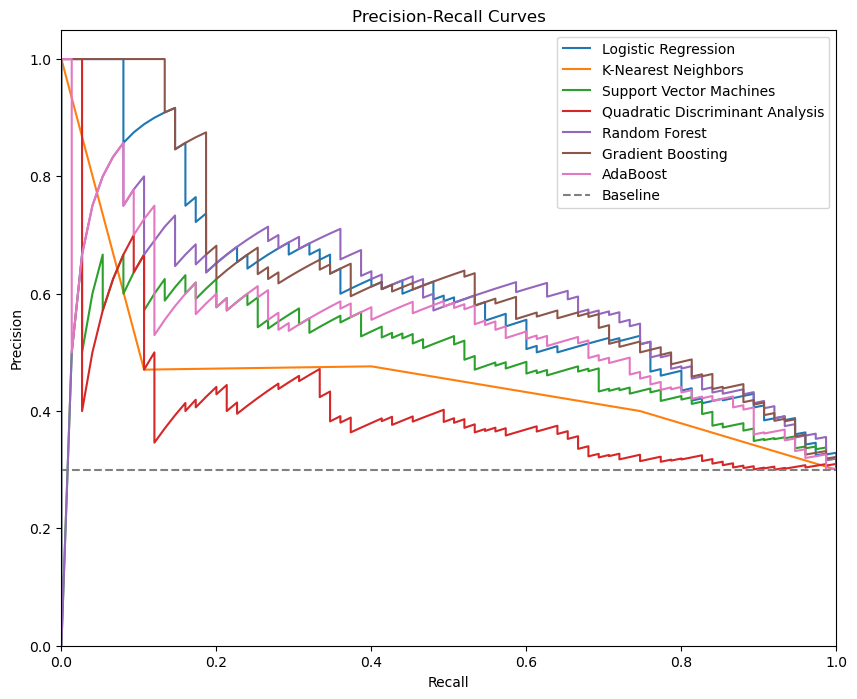

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
              Gradient Boosting 0.625953
            Logistic Regression 0.607566
                  Random Forest 0.587175
                       AdaBoost 0.539437
        Support Vector Machines 0.493231
            K-Nearest Neighbors 0.457832
Quadratic Discriminant Analysis 0.401522


In [30]:

# List of all the model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost']   

# List of corresponding fitted models
fitted_models = [logit, knn_bestk, svm_best, qda, random_forest_best, gradient_boosting_best,
                 adaboost_best]

# Dictionary to store precision-recall curve data and AUC-PR values
prc_data = {}
auc_pr_values = []

# Calculate precision-recall curve and AUC-PR for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)
        
    # Calculate precision-recall curve (i.e., precision and recall values at different threshold points)
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)
    
    # Calculate AUC-PR (i.e., area under the curve for each model)
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)
    
    # Store data in the dictionary
    prc_data[model_name] = {'precision': precision, 'recall': recall}

    

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for model_name in model_names:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)

# Calculate the ratio of positive and negative samples in the test set
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives

# Plot baseline curve (always predicting majority class)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-PR values
auc_pr_df = pd.DataFrame({'Model': model_names, 'AUC-PR': auc_pr_values})

# Sort DataFrame by AUC-PR in descending order
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

# Display AUC-PR values
print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))


## Final GBM model with custom Threshold (for a higher 'recall' performance).

AUC-PR Values (Area Under the Curve in a Precision-Recall plot) for top 4 Models :

                          Model   AUC-PR
                          
              Gradient Boosting   0.625953
            Logistic Regression   0.607566
                  Random Forest   0.587175
                       AdaBoost   0.539437
                        
Based on the above AUC-PR values among the top 4 performing models, we see that "Gradient Boosting" has the highest value. We can now try to find an optimal value for the threshold using the "Gradient Boosting" model, to obtain a satisfactory 'recall' performance value to suit our domain use-case (We need to reduce False Negatives - a defaulter going undetected by the model). 

A higher AUC-PR value for the "Gradient Boosting" model indicates that it has better overall performance in terms of the trade-off between precision and recall compared to the other models. A higher AUC-PR value generally indicates that the model is able to maintain high precision while achieving high recall as well, which is especially important for imbalanced datasets.

Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall): 0.30124072871866825
Optimal Precision: 0.5652173913043478
Optimal Recall: 0.6933333333333334


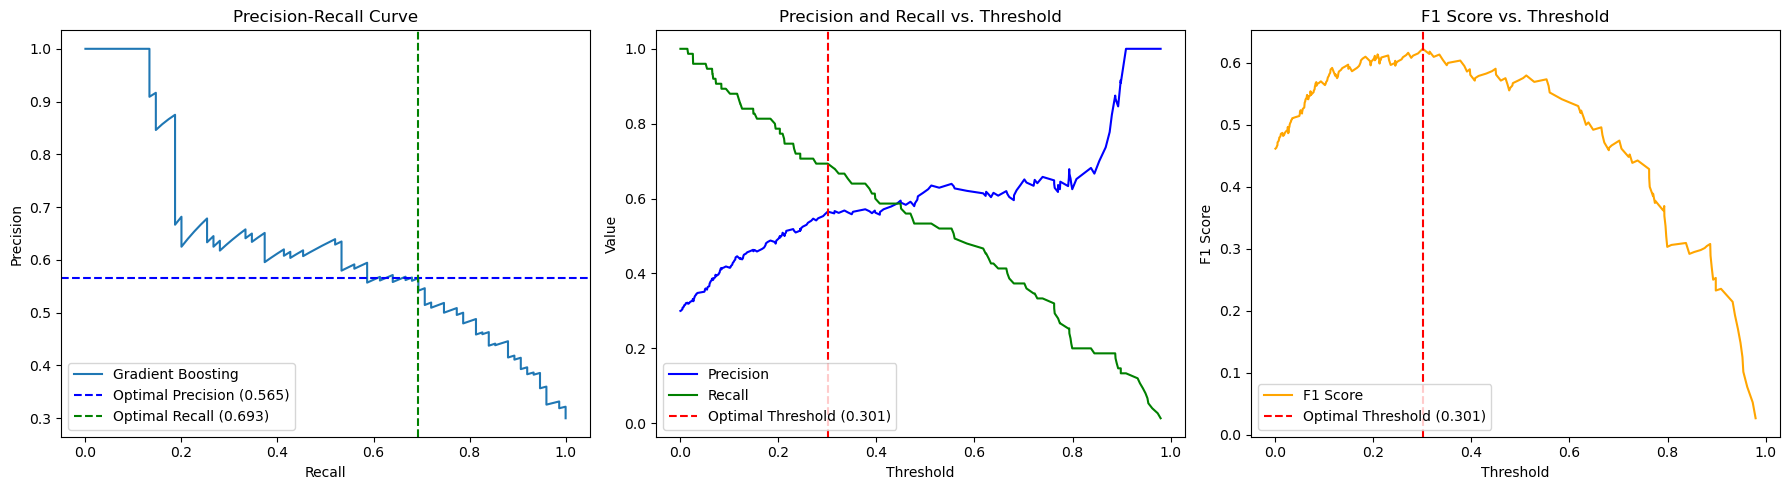

In [31]:

# Calculate predicted probabilities for positive class
predicted_probabilities = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)

# F1-score for different probability thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

# Threshold value that maximizes F1-score (i.e., optimizing both Precision and Recall)
optimal_threshold_index = np.argmax(f1_scores)

# Optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]
optimal_precision = precision[optimal_threshold_index]
optimal_recall = recall[optimal_threshold_index]
print("Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall):", optimal_threshold)
print("Optimal Precision:", optimal_precision)
print("Optimal Recall:", optimal_recall)



# Plot Precision-Recall curve for different thresholds
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(recall, precision, label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.axhline(y=optimal_precision, color='blue', linestyle='--', label=f'Optimal Precision ({optimal_precision:.3f})')
plt.axvline(x=optimal_recall, color='green', linestyle='--', label=f'Optimal Recall ({optimal_recall:.3f})')
plt.legend()


# Plot Precision and Recall VS threshold
plt.subplot(1, 3, 2)
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()

# Plot F1-score VS threshold
plt.subplot(1, 3, 3)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='orange')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Lowering the threshold value further than 'optimal_threshold' to reduce False Negatives.

custom_threshold = 0.18
print("Custom probability decision threshold:", custom_threshold)

# Calculate predicted probabilities for positive class (train and test)
predicted_probabilities_train_gb = gradient_boosting_best.predict_proba(X_train_scaled)[:, 1]
predicted_probabilities_test_gb = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

# Make predictions using the custom threshold for both train and test
y_pred_train_gb_custom = (predicted_probabilities_train_gb >= custom_threshold).astype(int)
y_pred_test_gb_custom = (predicted_probabilities_test_gb >= custom_threshold).astype(int)

# Performance metrics on training data using custom threshold
print("\nGradient Boosting (with custom Threshold) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb_custom))
conf_matrix_train_gb_custom = confusion_matrix(y_train, y_pred_train_gb_custom)
print("Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set): \n")
print(conf_matrix_train_gb_custom)


Custom probability decision threshold: 0.18

Gradient Boosting (with custom Threshold) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       525
           1       0.67      1.00      0.80       225

    accuracy                           0.85       750
   macro avg       0.84      0.89      0.84       750
weighted avg       0.90      0.85      0.86       750

Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set): 

[[416 109]
 [  1 224]]





Gradient Boosting (with custom Threshold) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       175
           1       0.49      0.81      0.61        75

    accuracy                           0.69       250
   macro avg       0.69      0.72      0.68       250
weighted avg       0.77      0.69      0.70       250



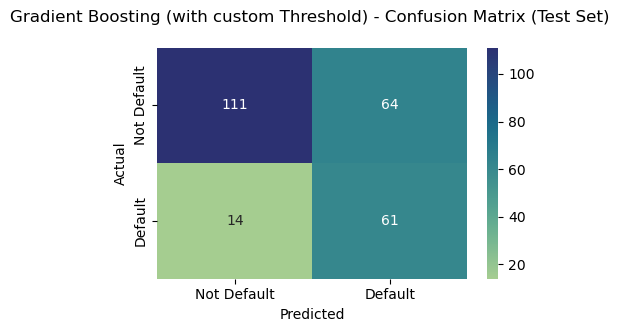

In [33]:
# Performance metrics on test data using custom threshold
print("\n\n\nGradient Boosting (with custom Threshold) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb_custom))
conf_matrix_test_gb_custom = confusion_matrix(y_test, y_pred_test_gb_custom)


# Confusion matrix for test data using custom threshold
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test_gb_custom, annot=True, fmt='d', cmap='crest',
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title('Gradient Boosting (with custom Threshold) - Confusion Matrix (Test Set) \n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Thank You